### Descripción del proyecto
Se te ha ido muy bien en el curso TripleTen y te han ofrecido hacer prácticas en el departamento analítico de Y.Afisha. Tu primera tarea es ayudar a optimizar los gastos de marketing.

Lo que tienes:

* registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
* un archivo con los pedidos en este periodo;
* estadísticas de gastos de marketing.

Lo que vas a investigar:

* cómo los clientes usan el servicio;
* cuándo empiezan a comprar;
* cuánto dinero aporta cada cliente a la compañía;
* cuándo los ingresos cubren el costo de adquisición de los clientes.

### Instrucciones para completar el proyecto

#### Paso 1. Descarga los datos y prepáralos para el análisis

Almacena los datos de visitas, pedidos y gastos en variables.  Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto.

Rutas de archivos: 

* /datasets/visits_log_us.csv. 
* /datasets/orders_log_us.csv. 
* /datasets/costs_us.csv.


#### Paso 2. Haz informes y calcula métricas 

Visitas:

* ¿Cuántas personas lo usan cada día, semana y mes?
* ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
* ¿Cuál es la duración de cada sesión?
* ¿Con qué frecuencia los usuarios y las usuarias regresan?

Ventas:
 
¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).

* ¿Cuántos pedidos hacen durante un período de tiempo dado?
* ¿Cuál es el tamaño promedio de compra?
* ¿Cuánto dinero traen? (LTV)

Marketing:
 
* ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
* ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
* ¿Cuán rentables eran las inversiones? (ROMI)

Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo. 

#### Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?

Formato: Completa la tarea en un Jupyter Notebook. Inserta el código en las celdas code y las explicaciones de texto en las celdas markdown. Aplica formato y encabezados.

#### Descripción de los datos

La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

* Uid: identificador único del usuario;
* Device: dispositivo del usuario;
* Start Ts: fecha y hora de inicio de la sesión;
* End Ts: fecha y hora de término de la sesión;
* Source Id: identificador de la fuente de anuncios de la que proviene el usuario.
* Todas las fechas de esta tabla están en formato AAAA-MM-DD.

La tabla orders (datos sobre pedidos):

* Uid: identificador único del usuario que realiza un pedido;
* Buy Ts: fecha y hora del pedido;
* Revenue: ingresos de Y.Afisha de este pedido.


La tabla costs (datos sobre gastos de marketing):

* source_id: identificador de la fuente de anuncios
* dt: fecha;
* costs: gastos en esta fuente de anuncios en este día.

# 1. Descarga los datos y prepáralos para el análisis

## 1.1. Librerias 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Preparar los Datos 

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Convertimos las columnas 'Device', 'End Ts', 'Start Ts'

In [5]:
visits['Device'] = visits['Device'].astype('category')
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Verificamos si tenemos datos duplicados

In [7]:
duplicados=visits.duplicated().sum()
duplicados

0

Verificamos si tenemos datos nulos

In [8]:
valores_nulos=visits.isnull().sum()
valores_nulos

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [9]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Convertimos la columna 'Buy Ts'

In [11]:
orders['Buy Ts']=pd.to_datetime(orders['Buy Ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Verificamos si tenemos datos duplicados

In [12]:
ordenes_duplicadas=orders.duplicated().sum()
ordenes_duplicadas

0

Verificamos si tenemos datos nulos

In [13]:
nulos=orders.isnull().sum()
nulos

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [14]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Convertimos la columna 'dt'

In [16]:
costs['dt']=pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Verificamos si tenemos datos duplicados

In [17]:
duplicados=costs.duplicated().sum()
duplicados

0

Verificamos si tenemos datos nulos

In [18]:
nulos=costs.isnull().sum()
nulos

source_id    0
dt           0
costs        0
dtype: int64

Por ultimo para el mejor manejo de todas las columnas los nombres a minusculas

In [19]:
orders.rename(columns={'Buy Ts':'buy_ts',
                          'Revenue':'revenue',
                          'Uid':'uid'}, 
                 inplace=True)

In [20]:
visits.rename(columns={'Device':'device',
                          'End Ts':'end_ts',
                          'Source Id': 'source_id',
                          'Start Ts':'start_ts',
                          'Uid':'uid'}, 
                 inplace=True)

## Visitas


In [21]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [22]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


#### ¿Cuántas personas lo usan cada día, semana y mes?

In [23]:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
visits['session_date'] = visits['start_ts'].dt.date

In [24]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [25]:
visits_touch=visits[visits['device']=='touch']
visits_desktop=visits[visits['device']=='desktop']

In [26]:
users_per_month=visits.groupby(['session_year','session_month']).agg({'uid':'nunique'}).mean()
users_per_week=visits.groupby(['session_year','session_week']).agg({'uid':'nunique'}).mean()
users_per_day=visits.groupby('session_date').agg({'uid':'nunique'}).mean()

In [27]:
print('Usuarios por dia:',int(users_per_day.iloc[0]))
print('Usuarios por semana:',int( users_per_week.iloc[0]))
print('Usuarios por mes:',int( users_per_month.iloc[0]))

Usuarios por dia: 907
Usuarios por semana: 5716
Usuarios por mes: 23228


In [28]:
sessions_per_user=visits.groupby(['session_date']).agg({'uid':['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user

,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


In [29]:
avg_sessions_per_user = sessions_per_user.mean()
avg_sessions_per_user

n_sessions           987.362637
n_users              907.991758
sessions_per_user      1.082170
dtype: float64

In [30]:
visits['duration']=(visits['end_ts']-visits['start_ts']).dt.seconds
print('Duracion promedio por sesion',(visits['duration'].mean()/60).round(2),'minutos')

Duracion promedio por sesion 10.73 minutos


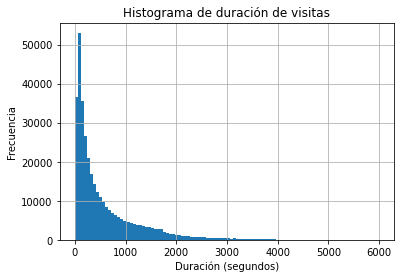

Duración más frecuente: 60 segundos


In [31]:
visits['duration'].hist(bins=100, range=(0, 6000))
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.title('Histograma de duración de visitas')
plt.show()
most_frequent_duration = int(visits['duration'].mode().iloc[0])
print('Duración más frecuente:', most_frequent_duration, 'segundos')

In [32]:
print('Porcentaje de usuarios que regresan al sitio web en una semana es: {:.2%}'.format(int(users_per_day.iloc[0]) / int(users_per_week.iloc[0])))
print('Porcentaje de usuarios que regresan al sitio web en un mes es: {:.2%}'.format(int(users_per_day.iloc[0]) / int(users_per_month.iloc[0])))

Porcentaje de usuarios que regresan al sitio web en una semana es: 15.87%
Porcentaje de usuarios que regresan al sitio web en un mes es: 3.90%


Los usuarios regresan más semanalmente que mensualmente.

In [33]:
first_visit_datetime = visits.groupby('uid')['start_ts'].min()
first_visit_datetime.name = 'first_visit_date'
visits = visits.join(first_visit_datetime ,on='uid')

Cohortes por mes de compra

In [34]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')

Creamos una tabla dinámica para encontrar cuántas personas continúan realizando compras en los meses siguientes al mes de la primera compra.

In [35]:
absolute_values = visits.pivot_table(index='first_visit_month', columns='visit_month', values='uid', aggfunc='nunique')
absolute_values

visit_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_visit_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,NaN,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
2017-08-01,NaN,NaN,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
2017-09-01,NaN,NaN,NaN,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
2017-10-01,NaN,NaN,NaN,NaN,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
2017-11-01,NaN,NaN,NaN,NaN,NaN,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,25268.0,1410.0,960.0,786.0,512.0,481.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22624.0,1351.0,890.0,565.0,458.0
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22197.0,1267.0,565.0,446.0


Encontrando la vida útil de la cohorte

In [36]:
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

Agrupamos  los datos por cohorte y vida útil , encontramos la cantidad de usuarios activos en un determinado mes de vida para cada cohorte.

In [37]:
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')
cohorts

,first_visit_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


Calculamos la tasa de retención. Dividimos la cantidad de usuarios activos en cada semana por la cantidad inicial de usuarios en la cohorte

In [38]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum').round(2)


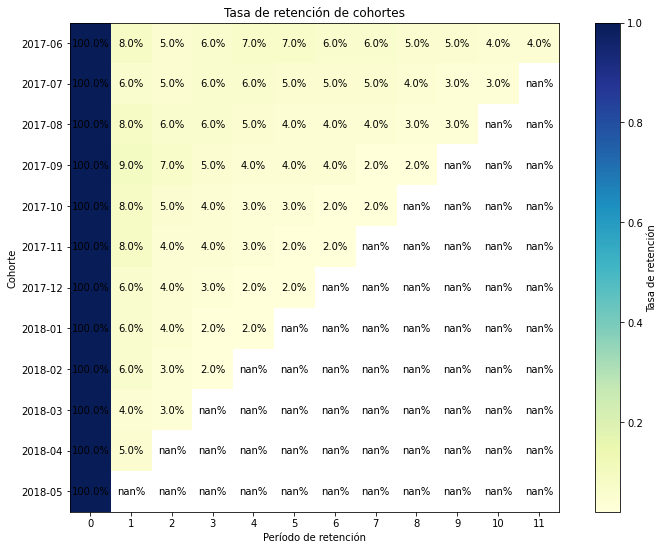

In [39]:
plt.figure(figsize=(13, 9))
plt.title('Tasa de retención de cohortes')
plt.imshow(retention_pivot, cmap='YlGnBu', interpolation='nearest')

for i in range(len(retention_pivot.index)):
    for j in range(len(retention_pivot.columns)):
        plt.text(j, i, '{:.1%}'.format(retention_pivot.iloc[i, j]),
                 ha='center', va='center', color='black')

plt.colorbar(label='Tasa de retención')
plt.xticks(ticks=range(len(retention_pivot.columns)), labels=retention_pivot.columns)
plt.yticks(ticks=range(len(retention_pivot.index)), labels=retention_pivot.index.strftime('%Y-%m'))
plt.xlabel('Período de retención')
plt.ylabel('Cohorte')
plt.show()


## Ventas

¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).


In [40]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [41]:
first_order_dates = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_order_dates.columns= ['uid','first_order_date']

first_session_dates = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_session_dates.columns= ['uid','first_session_date']
 
conversion = pd.merge(first_session_dates, first_order_dates, on='uid')
 
conversion['conversion_time_days'] = (conversion['first_order_date'] - conversion['first_session_date']).dt.days
 
avg_conversion_time = conversion['conversion_time_days'].mean()

total_visitor = (visits['uid']).nunique()
total_purchaser = (conversion['uid']).nunique()
converted = total_purchaser / total_visitor

print('El total de usuarios que visitan la página web es', total_visitor)
print('El total de usuarios que han realizado una compra es', total_purchaser)
print('La tasa de conversión es {:.2%}'.format(converted))
print("el promedio es, {:.0f} días transcurridos desde la primera sesión del usuario hasta su primer pedido".format(avg_conversion_time))

El total de usuarios que visitan la página web es 228169
El total de usuarios que han realizado una compra es 36523
La tasa de conversión es 16.01%
el promedio es, 17 días transcurridos desde la primera sesión del usuario hasta su primer pedido


In [42]:
conversion['first_session_month'] = conversion['first_session_date'].astype('datetime64[M]')

In [43]:
conversion.head()

,uid,first_session_date,first_order_date,conversion_time_days,first_session_month
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106,2017-09-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0,2017-11-01


In [44]:
bins = [-1, 0, 7, 14, 30, 364]
labels = ['0d', '7d', '14d', '30d', '31+d']

conversion['conversion_time'] = pd.cut(conversion['conversion_time_days'], bins=bins, labels=labels)

In [45]:
conversion_cohorts = conversion.groupby(['first_session_month','conversion_time']).agg({'uid':'nunique'}).reset_index()

In [46]:
total_conversion = conversion_cohorts.pivot_table(
    index='first_session_month',
    columns='conversion_time',
    values='uid',
    aggfunc='sum'
)
total_conversion = total_conversion.reindex(['0d','7d', '14d','30d','31+d'], axis=1)

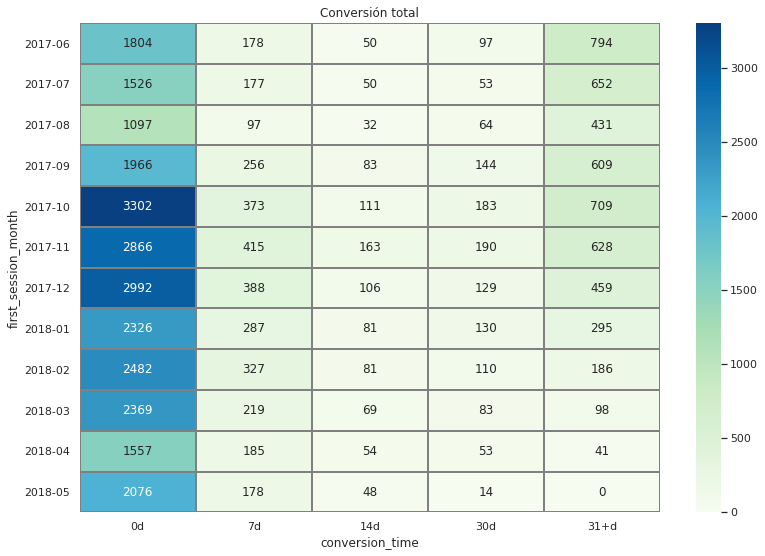

In [47]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Conversión total')
sns.heatmap(
    total_conversion,
    annot=True, 
    fmt='.0f', 
    linewidths=1, 
    linecolor='gray', 
    cmap="GnBu"
).set_yticklabels(total_conversion.index.strftime('%Y-%m'))
norm = plt.Normalize(-100,100)

plt.show();

In [48]:
zero = conversion.query('conversion_time == "0d"').count()['uid']/(visits['uid']).nunique()
seven = conversion.query('conversion_time == "7d"').count()['uid']/(visits['uid']).nunique()
fourteen = conversion.query('conversion_time == "14d"').count()['uid']/(visits['uid']).nunique()
thirty = conversion.query('conversion_time == "30d"').count()['uid']/(visits['uid']).nunique()
long = conversion.query('conversion_time == "31+d"').count()['uid']/(visits['uid']).nunique()

print('Porcentaje de usuarios que realizan una compra el mismo día de su primera visita: {:.2%}'.format(zero))
print('Porcentaje de usuarios que realizan una compra dentro de los 7 días posteriores a su primera visita: {:.2%}'.format(seven))
print('Porcentaje de usuarios que realizan una compra dentro de los 14 días posteriores a su primera visita: {:.2%}'.format(fourteen))
print('Porcentaje de usuarios que realizan una compra dentro de los 30 días posteriores a su primera visita: {:.2%}'.format(thirty))
print('Porcentaje de usuarios que realizan una compra más de 30 días después de su primera visita: {:.2%}'.format(long))

Porcentaje de usuarios que realizan una compra el mismo día de su primera visita: 11.55%
Porcentaje de usuarios que realizan una compra dentro de los 7 días posteriores a su primera visita: 1.35%
Porcentaje de usuarios que realizan una compra dentro de los 14 días posteriores a su primera visita: 0.41%
Porcentaje de usuarios que realizan una compra dentro de los 30 días posteriores a su primera visita: 0.55%
Porcentaje de usuarios que realizan una compra más de 30 días después de su primera visita: 2.15%


#### ¿Cuál es el tamaño promedio de compra?

In [49]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
first_order_day = orders.groupby('uid')['buy_ts'].min()
first_order_day.name = 'first_order_day'
orders = orders.join(first_order_day, on='uid')

In [50]:
orders['first_order_month'] = orders['first_order_day'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')


In [51]:
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()

In [52]:
orders_grouped_by_cohorts.columns = ['first_order_month','order_month','revenue', 'n_users']

In [53]:
orders_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,n_users
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,61
2,2017-06-01,2017-08-01,885.34,50
3,2017-06-01,2017-09-01,1931.30,54
4,2017-06-01,2017-10-01,2068.58,88


In [54]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['n_users']
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue_per_user'].round()

In [55]:
orders_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,n_users,revenue_per_user
0,2017-06-01,2017-06-01,9557.49,2023,5.0
1,2017-06-01,2017-07-01,981.82,61,16.0
2,2017-06-01,2017-08-01,885.34,50,18.0
3,2017-06-01,2017-09-01,1931.30,54,36.0
4,2017-06-01,2017-10-01,2068.58,88,24.0


In [56]:
print('Compra media por usuario',orders_grouped_by_cohorts['revenue_per_user'].mean())

Compra media por usuario 14.746835443037975


In [57]:
orders_grouped_by_cohorts.pivot_table(index='first_order_month', columns='order_month', values='revenue_per_user', aggfunc='mean')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,5.0,16.0,18.0,36.0,24.0,22.0,31.0,25.0,19.0,27.0,26.0,10.0,NaN
2017-07-01,NaN,6.0,12.0,21.0,11.0,7.0,8.0,6.0,7.0,7.0,13.0,12.0,NaN
2017-08-01,NaN,NaN,5.0,11.0,12.0,12.0,17.0,12.0,10.0,13.0,21.0,8.0,NaN
2017-09-01,NaN,NaN,NaN,6.0,22.0,13.0,139.0,20.0,26.0,27.0,17.0,11.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.0,11.0,7.0,7.0,7.0,7.0,7.0,7.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,13.0,7.0,5.0,8.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,5.0,8.0,39.0,48.0,27.0,24.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,9.0,12.0,11.0,5.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,9.0,5.0,7.0,NaN



#### ¿Cuánto dinero traen? (LTV)

Obtenemos la fecha del primer pedido y el mes de cada cliente para conocer su tiempo de vida como cliente.

In [58]:
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_date']
orders['month'] = orders['buy_ts'].astype('datetime64[M]')

In [59]:
first_orders['first_order_date'] = first_orders['first_order_date'].dt.date
first_orders['first_order_month'] = first_orders['first_order_date'].astype('datetime64[M]')

In [60]:
orders = orders.merge(first_orders, on =['uid','first_order_month'])
cohort_size = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()

Encontramos la cantidad de compradores únicos y la suma de ingresos de cada cohorte.

In [62]:
cohort_size.columns = ['first_order_month','n_purchasers']
cohort_revenue = orders.groupby(['first_order_month', 'month']).agg({'revenue': 'sum'}).reset_index()

In [63]:
revenue = pd.merge(cohort_size, cohort_revenue, on='first_order_month')
revenue['age'] = (revenue['month'] - revenue['first_order_month']) / np.timedelta64(1, 'M')
revenue['age'] = revenue['age'].round().astype('int')

Una vez que encontramos la cohorte/edad de los clientes, podemos calcular el valor de vida de los clientes dividiendo los ingresos por la cantidad de clientes en dicha cohorte.

In [64]:
revenue['ltv'] = revenue['revenue'] / revenue['n_purchasers']
ltv = revenue.pivot_table(index='first_order_month',columns='age',values='ltv', aggfunc='mean')
ltv_sum = ltv.cumsum(axis=1)

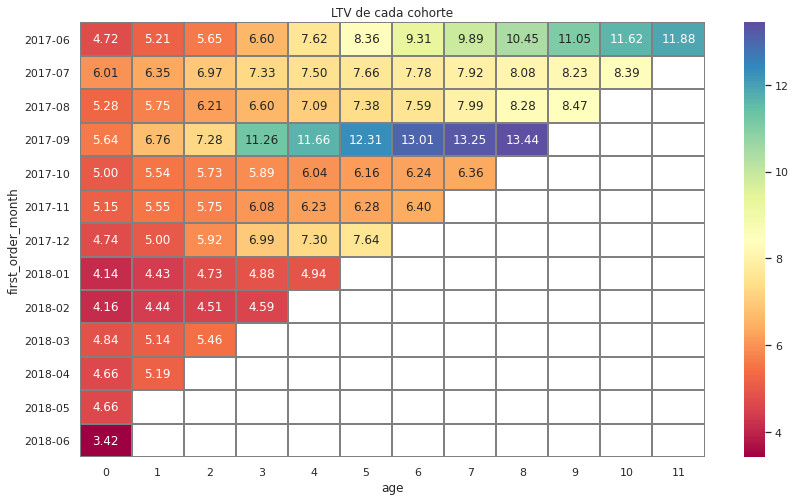

In [65]:
plt.figure(figsize=(14, 8))
plt.title('LTV de cada cohorte')
sns.heatmap(ltv_sum, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="Spectral").set_yticklabels(ltv_sum.index.strftime('%Y-%m'))
plt.show()

## Marketing:
 

#### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [66]:
costs['expense_month'] = costs['dt'].astype('datetime64[M]')

In [67]:
monthly_costs = costs.groupby('expense_month').sum().reset_index()

In [68]:
monthly_costs['order_month'] = monthly_costs['expense_month'].dt.strftime('%Y-%m')

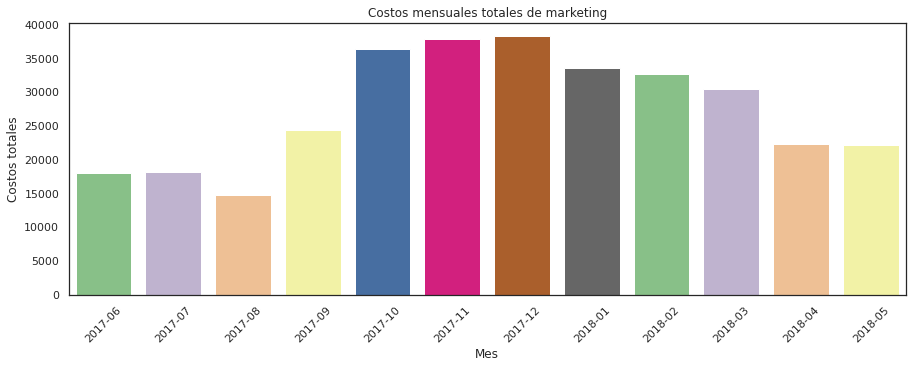

In [69]:
plt.figure(figsize=(15,5))
plt.title("Costos mensuales totales de marketing")

sns.set_style("whitegrid")
sns.barplot(data=monthly_costs, x='expense_month', y='costs', palette="Accent").set_xticklabels(monthly_costs.order_month)

plt.xlabel('Mes')
plt.ylabel('Costos totales')
plt.xticks(rotation=45)
plt.show();

In [70]:
print('Los costos totales de marketing son  $', int(costs.costs.sum()))
print('Los costos mensuales promedio de marketing son $', int(monthly_costs['costs'].mean()))

Los costos totales de marketing son  $ 329131
Los costos mensuales promedio de marketing son $ 27427


Cada mes, el departamento de marketing de Yandex Afisha gasta entre 15.000 y 40.000 dólares, con un promedio de 27.427 dólares. En el siguiente apartado descubriremos si merece la pena

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

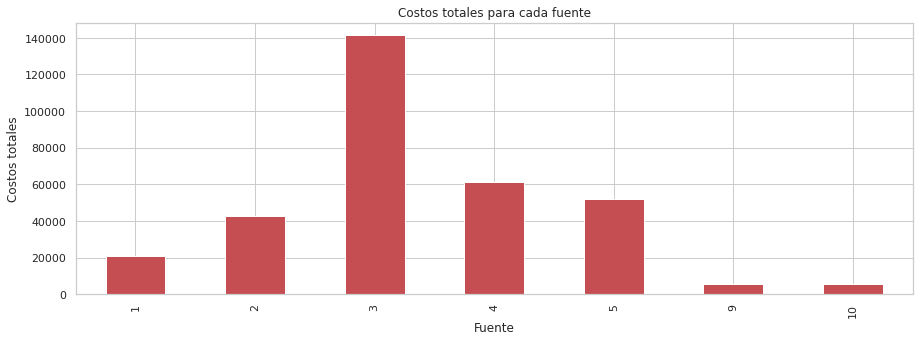

In [71]:
source_costs = costs.groupby('source_id')['costs'].sum().reset_index()

source_costs.plot(x='source_id', y='costs', kind='bar', figsize=(15, 5), color='r', legend=False)

plt.title("Costos totales para cada fuente")
plt.xlabel('Fuente')
plt.ylabel('Costos totales');

Al observar el gráfico de barras, podemos ver que la fuente 3 le está costando al departamento de marketing significativamente más que cualquier otra fuente, en total $140 000. Las fuentes 9 y 10 gastan igualmente poco, menos de 20.000 dólares.

Costos mensuales de marketing por fuente

In [72]:
total_costs = costs.groupby(['expense_month','source_id']).sum().reset_index()

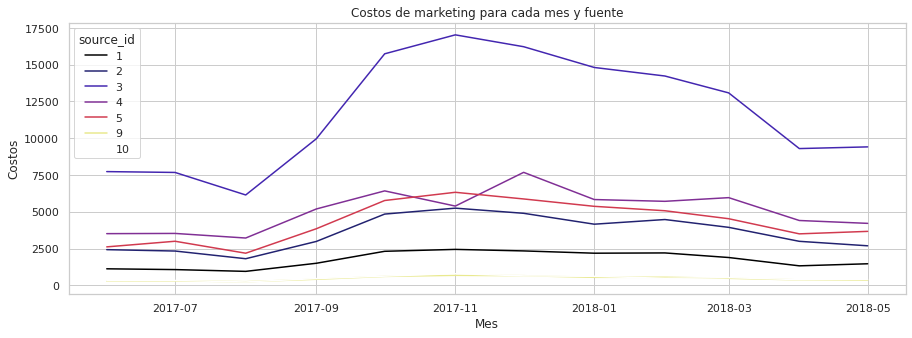

In [73]:
plt.figure(figsize=(15,5))
plt.title('Costos de marketing para cada mes y fuente')
plt.xlabel('Mes')
plt.ylabel('Costos')

sns.set_style('whitegrid')
sns.lineplot(data=total_costs, x='expense_month', y='costs', legend='full', hue='source_id', palette='CMRmap')

plt.show();

La fuente 3 le cuesta al departamento de marketing entre \\$6000 y \\$17500 cada mes, mientras que otras fuentes siempre cuestan menos de \\$7500.

#### ¿Cuán rentables eran las inversiones? (ROMI)

Realicemos los cálculos para los cohortes y determinemos la cantidad de meses que cada cohorte requiere para cubrir los gastos de marketing. Calcularé el CAC para cada cohorte. Primero encontraremos los gastos totales de cada mes, luego los dividiremos por la cantidad de clientes en cada cohorte.

In [74]:
costs['Month'] = costs['dt'].astype('datetime64[M]')
total_costs = costs.groupby(['Month','source_id']).sum().reset_index()
monthly_costs = costs.groupby('Month').sum().reset_index()
monthly_costs['order_month'] = monthly_costs['Month'].dt.strftime('%Y-%m')

In [75]:
cac = pd.merge(revenue, monthly_costs, left_on='first_order_month', right_on='Month')

In [76]:
cac['cac'] = cac['costs'] / cac['n_purchasers']

In [77]:
cac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 77
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_order_month  78 non-null     datetime64[ns]
 1   n_purchasers       78 non-null     int64         
 2   month              78 non-null     datetime64[ns]
 3   revenue            78 non-null     float64       
 4   age                78 non-null     int64         
 5   ltv                78 non-null     float64       
 6   Month              78 non-null     datetime64[ns]
 7   source_id          78 non-null     int64         
 8   costs              78 non-null     float64       
 9   order_month        78 non-null     object        
 10  cac                78 non-null     float64       
dtypes: datetime64[ns](3), float64(4), int64(3), object(1)
memory usage: 7.3+ KB


In [78]:
cac['tick_month'] = cac['month'].dt.strftime('%Y-%m')

Encontremos ROMI (retorno de la inversión en marketing) dividiendo LTV por CAC.

In [79]:
cac['romi'] = cac['ltv'] / cac['cac']

In [80]:
romi = cac.pivot_table( index='first_order_month',  columns='age',  values='romi', aggfunc='mean')
sum_romi = romi.cumsum(axis=1)

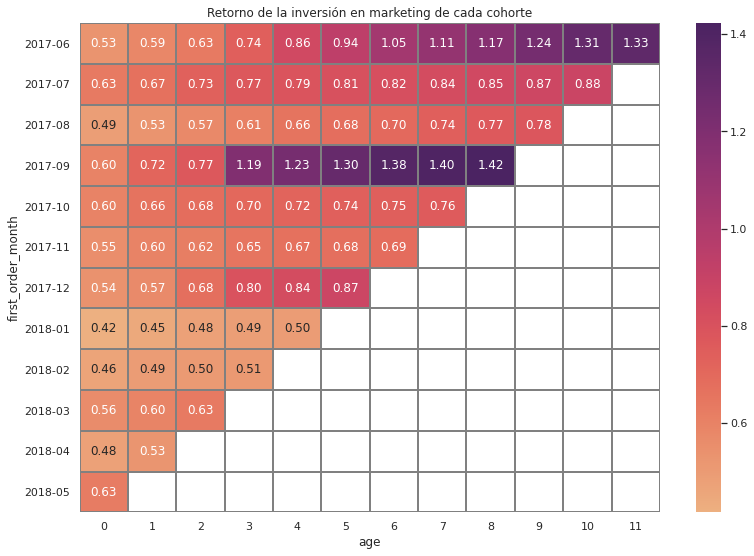

In [81]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retorno de la inversión en marketing de cada cohorte')
sns.heatmap(sum_romi, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="flare").set_yticklabels(sum_romi.index.strftime('%Y-%m'))
plt.show()

Podemos ver que solo las cohortes de junio de 2017 y septiembre de 2017 pagan los costos de adquisición. Se necesitan 6 meses para la cohorte de junio de 2017 y solo 3 meses para la de septiembre de 2017.

Ahora vemos el romi por diversas fuentes 

In [82]:
combined_data = orders.merge(visits[['uid', 'source_id']], on='uid')
revenue_per_source = combined_data.groupby('source_id')['revenue'].sum().reset_index()

In [83]:
total_costs = costs.groupby('source_id')['costs'].sum().reset_index()
customers_per_source = orders.merge(visits, on='uid').groupby('source_id')['uid'].nunique().reset_index()
cac = pd.merge(total_costs, customers_per_source, on='source_id')
cac['cac'] = cac['costs'] / cac['uid']

In [84]:
ltv_per_source = revenue_per_source.merge(cac[['source_id', 'cac']], on='source_id')
ltv_per_source['ltv'] = ltv_per_source['revenue'] / ltv_per_source['cac']
ltv_per_source['romi'] = (ltv_per_source['revenue'] - ltv_per_source['cac'])  
ltv_per_source['romi'] =ltv_per_source['romi'] /ltv_per_source['cac']
ltv_per_source

,source_id,revenue,cac,ltv,romi
0,1,2.298200e+06,2.918642,787420.928805,787419.928805
1,2,2.638189e+06,5.859828,450216.188628,450215.188628
2,3,2.966880e+05,10.206676,29068.030804,29067.030804
3,4,4.966902e+05,4.284965,115914.650406,115913.650406
4,5,1.181477e+06,5.096209,231834.508383,231833.508383
5,9,3.634225e+04,1.975471,18396.753642,18395.753642
6,10,1.461923e+04,3.283976,4451.685583,4450.685583


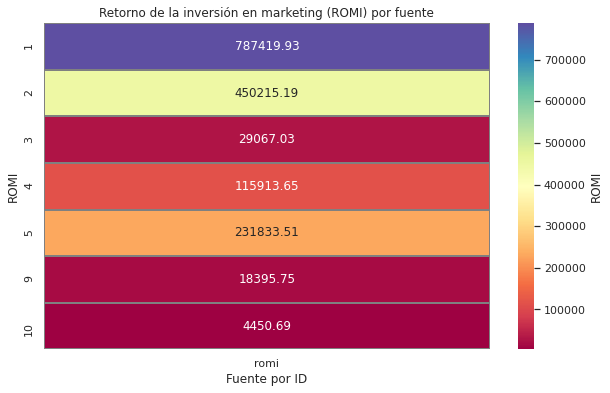

In [85]:
sns.set(style='white')
plt.figure(figsize=(10, 6))
sns.heatmap(ltv_per_source.pivot_table(index='source_id', values='romi', aggfunc='mean'),annot=True,fmt='.2f',cmap='Spectral',linewidths=1,linecolor='gray',cbar_kws={'label': 'ROMI'})
plt.title('Retorno de la inversión en marketing (ROMI) por fuente')
plt.xlabel('Fuente por ID')
plt.ylabel('ROMI')
plt.show()

Si tenemos  LTV y el ROMI tienen valores parecidos, podría indicar una alineación positiva entre la inversión en marketing y el valor generado por los clientes a lo largo del tiempo. 

Eficiencia en la inversión de marketing: Un LTV alto en comparación con el costo de adquisición de clientes (CAC) resultaría en un ROMI positivo. Esto sugiere que la inversión en marketing está generando un retorno favorable en términos de ingresos a lo largo del tiempo.
Buena segmentación de audiencia: Si el ROMI es alto y el LTV también es alto, podría indicar que la empresa está dirigida a segmentos de audiencia que son rentables y tienen un alto potencial de valor a largo plazo.
Calidad de clientes adquiridos: Un LTV y un ROMI similares podrían sugerir que la empresa está adquiriendo clientes de alta calidad a través de sus esfuerzos de marketing, es decir, clientes que generan un valor significativo y sostenido para la empresa en relación con el costo de adquisición.

 ## Conclusiones generales

Preparación de datos:

- Antes del análisis, se realizó una preparación exhaustiva de los datos, incluyendo la corrección de problemas, cambios en los tipos de datos y la adición de información relevante.

Análisis exploratorio de datos: 

- Se examinaron varios aspectos del comportamiento del usuario, como la duración promedio de la sesión, la retención de usuarios, el tiempo entre la visita y la compra, y los patrones de compra periódica. Se observaron picos en los pedidos diarios y semanales, posiblemente relacionados con eventos específicos en la ciudad.
Costos de marketing: 

- Se identificó que la fuente 3 está incurriendo en los mayores costos de marketing, con un gasto significativo que supera el retorno en la mayoría de los casos.

Métricas comerciales clave:

- Se calcularon y analizaron métricas importantes como la tasa de conversión, el tamaño promedio de compra, el valor de vida del cliente y el costo de adquisición de clientes. Estos datos proporcionan información crucial sobre el rendimiento general del negocio.

___

